In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'tensorflow.python.trackable'

In [ ]:
# Download data from Yahoo Finance
data = yf.download('AAPL', start='2010-01-01', end='2023-12-31')
data = data[['Close']]
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2010-01-04,6.431895
2010-01-05,6.443016
2010-01-06,6.340533
2010-01-07,6.328810
2010-01-08,6.370887


In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences (60 days of data to predict the next)
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=5, batch_size=32)

Epoch 1/5


c:\Users\sneha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0176
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1622e-04
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.1041e-04
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.9867e-04
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 3.1068e-04


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


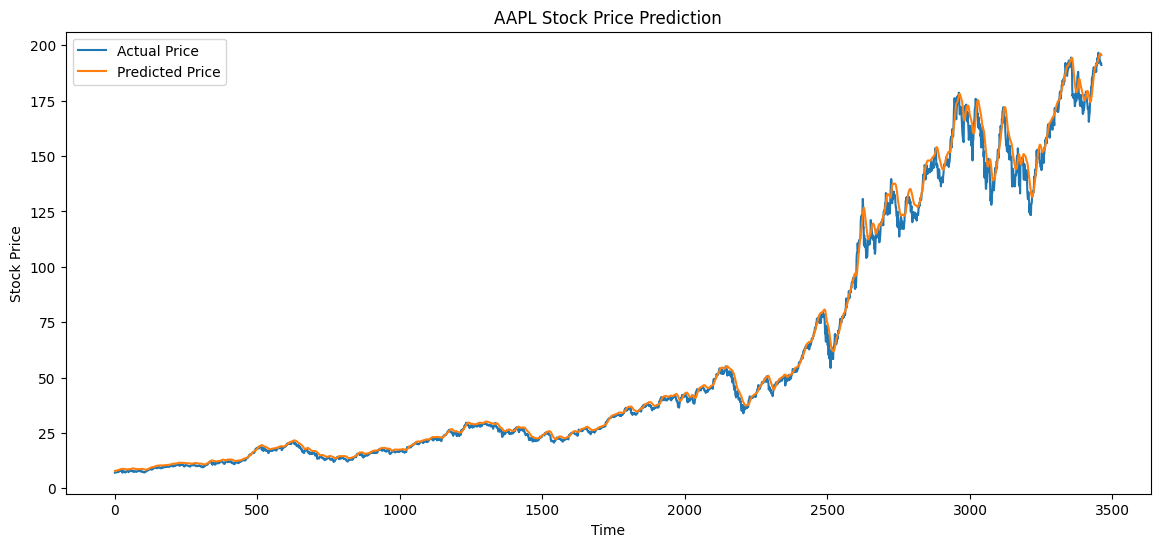

In [ ]:
# Predict using the model
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14,6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [1]:
# Evaluation code (ready to run)
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# y_test and predictions must be 1D arrays in original price scale
# Example names: y_test_orig (shape: (n,)), predictions (shape: (n,))

mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")


NameError: name 'real_prices' is not defined